In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv("C:/Users/youca/Music/data.csv", encoding='latin-1')

In [ ]:
#Data Exploration

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Show columns containing at least one value of 0 (zero).
df.columns[df.isin([0]).any()]

Index(['UnitPrice'], dtype='object')

In [8]:
# Show columns containing at least one missing value (NaN)
df.columns[df.isna().any()]

Index(['Description', 'CustomerID'], dtype='object')

In [9]:
# Method to display the number of missing values (NaN) in each column of the DataFrame
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Data Cleaning

In [10]:
# Calculate the mean of 'UnitPrice'
unit_price_mean = df['UnitPrice'].mean()

In [11]:
# Replace values of 0 with the mean
df['UnitPrice'] = df['UnitPrice'].replace(0, unit_price_mean)

In [12]:
df['Description'].fillna('No description available')

# Show how many missing values remain in each column of the DataFrame
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Function to replace NaN in CustomerID with custom text
def fill_customer_id(row):
    if pd.isna(row['CustomerID']):
        return f"Customer of Invoice Nº {row['InvoiceNo']}"
    else:
        return row['CustomerID']
    
# Apply the function to each row
df['CustomerID'] = df.apply(fill_customer_id, axis=1)

# Show how many missing values remain in each column of the DataFrame
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Display and review the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Sales and Product Analysis

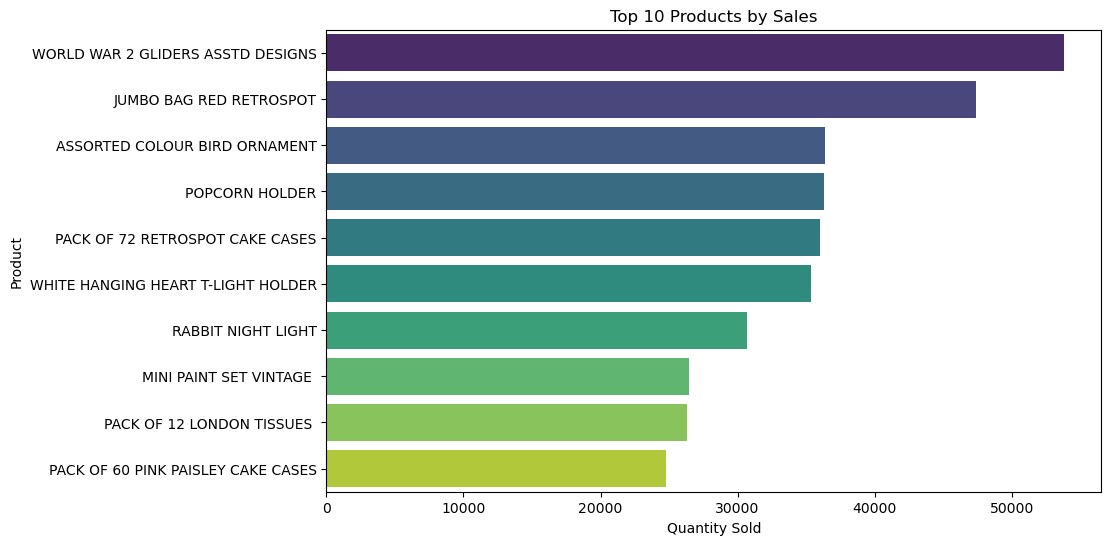

In [15]:
sales_by_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette='viridis')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.title('Top 10 Products by Sales')
plt.show()

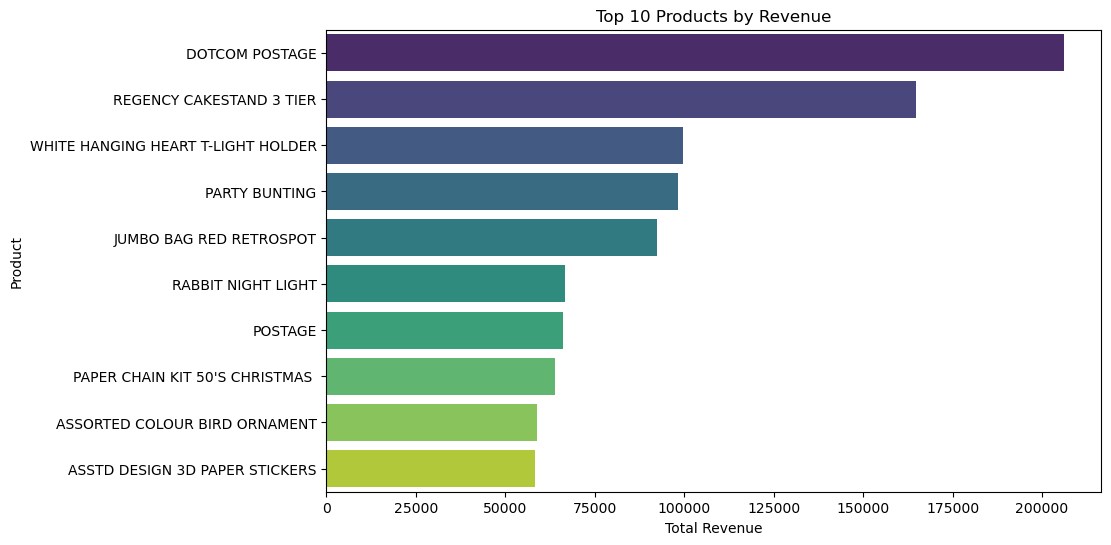

In [16]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette='viridis')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Products by Revenue')
plt.show()

In [ ]:
#Customer Analysis

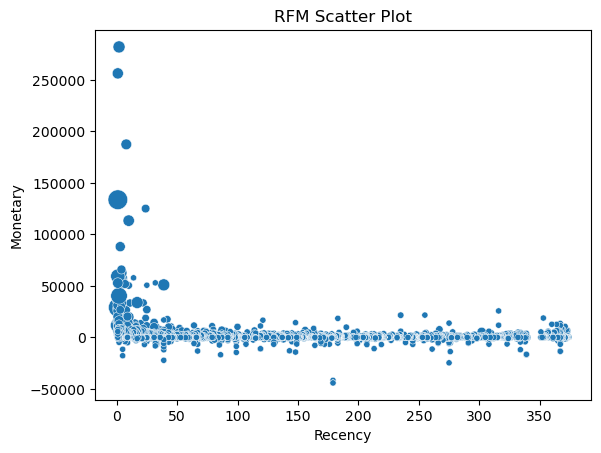

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
8077,Customer of Invoice Nº C578097,17,1,-1208.04
8078,Customer of Invoice Nº C579757,9,1,-15.60
8079,Customer of Invoice Nº C579907,9,1,-15.30
8080,Customer of Invoice Nº C580604,5,1,-11586.50


In [17]:
# Reference date for calculating recency
reference_date = df['InvoiceDate'].max() + timedelta(days=1)

# Calculate RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# RFM Visualization
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', data=rfm, legend=False, sizes=(20, 200))
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('RFM Scatter Plot')
plt.show()

rfm

In [18]:
customer_purchase_pattern = df.groupby('CustomerID')['InvoiceNo'].nunique().describe()
customer_purchase_pattern

count    8082.000000
mean        3.204652
std         7.162265
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       248.000000
Name: InvoiceNo, dtype: float64

In [ ]:
#Sales Analysis by Countries

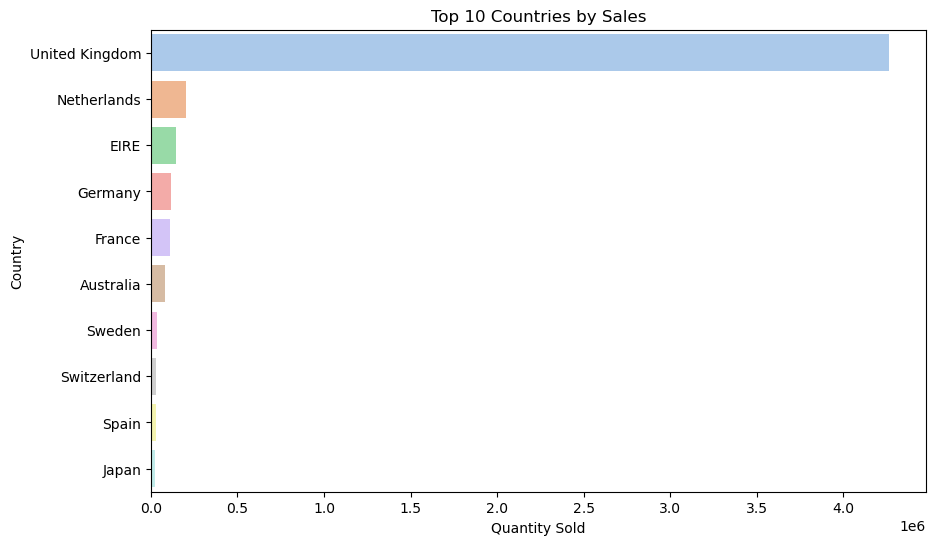

In [19]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='pastel')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')
plt.show()

In [ ]:
#Trends and Seasonalities

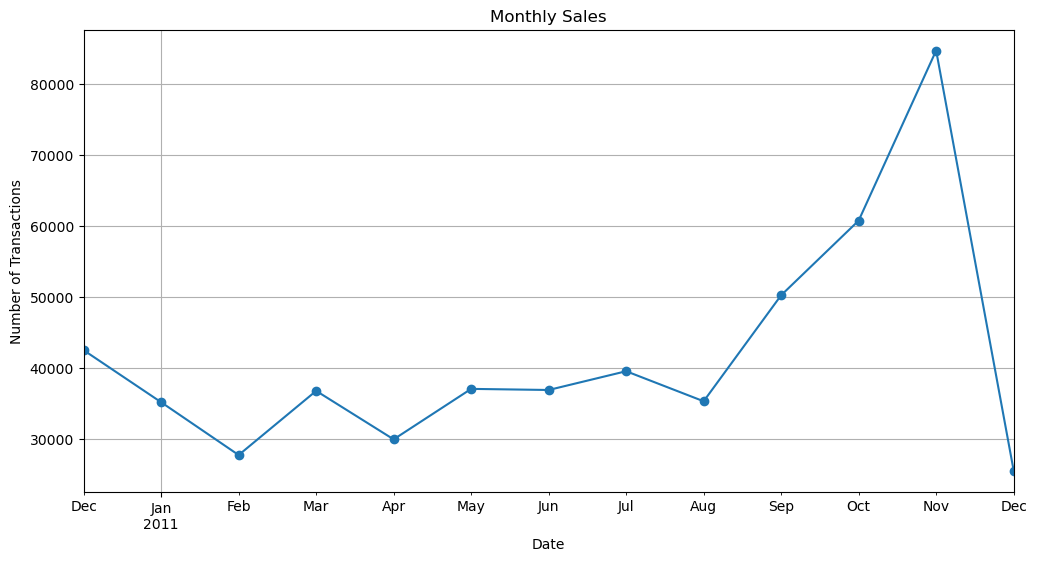

In [20]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales')
plt.grid(True)
plt.show()


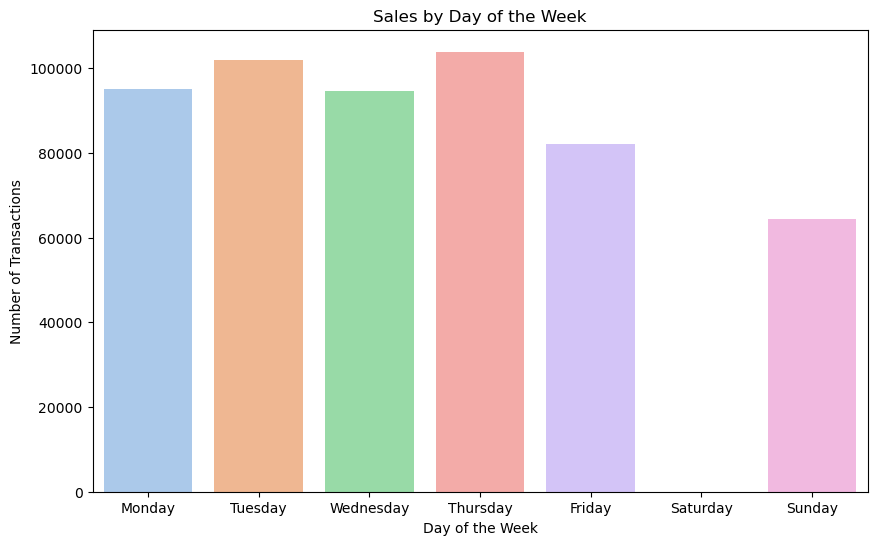

In [21]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='pastel')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Sales by Day of the Week')
plt.show()

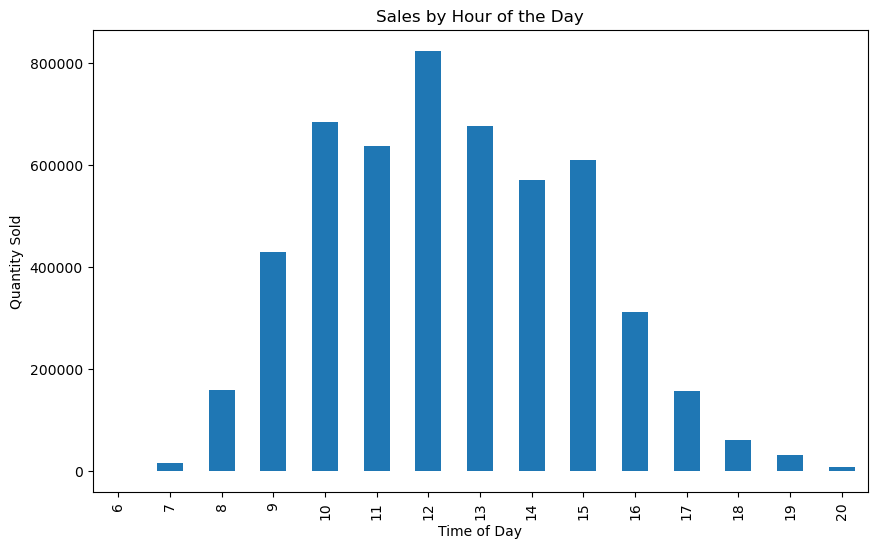

In [22]:
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Quantity Sold')
plt.title('Sales by Hour of the Day')
plt.show()